# Data 102 Final Project

Health Outcomes and Socioeconomic Factors in American Counties


## EDA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("cancer_reg.csv")
#Creating new column for incidence rate of cancer based off of average annual 
#count and population estimates for 2015
df['pctcancer'] = df['avganncount'] / df['popest2015']
df.head()
df.shape

(3047, 35)

In [79]:
#dropping these inconsistent data pieces about avganncount, these counts, with 1962 seem to be very inconsistent
df[df["pctcancer"] > 0.90] 
df[df["avganncount"] == 1962.667684]

,index,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,pctcancer
111,111,1962.667684,62,211.0,453.549422,46840,24200,13.2,0.000000,"(45201, 48021.6]",...,34.9,37.0,17.3,81.840673,2.370938,2.667821,3.645060,49.699208,7.724034,0.081102
112,112,1962.667684,3120,167.7,453.549422,51241,2114801,15.6,405.239075,"(51046.4, 54545.6]",...,45.4,27.3,16.0,63.750484,10.836856,9.169757,10.145895,43.813065,5.125073,0.000928
113,113,1962.667684,108,145.2,453.549422,60322,47710,10.3,0.000000,"(54545.6, 61494.5]",...,39.6,35.8,12.9,89.151273,0.554392,1.305571,3.499862,56.135295,5.193754,0.041137
114,114,1962.667684,55,143.2,453.549422,72648,51935,10.8,0.000000,"(61494.5, 125635]",...,60.9,18.5,10.0,88.136612,1.289709,0.927039,2.561964,57.820976,6.700734,0.037791
115,115,1962.667684,4,262.1,453.549422,47180,829,14.0,0.000000,"(45201, 48021.6]",...,34.9,37.1,16.5,87.379492,0.000000,0.000000,7.975460,40.579710,4.326923,2.367512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,0.309423
3043,3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,0.052876
3044,3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,0.056830
3045,3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,0.076640


In [80]:
#dropping inconsistencies
df = df[df['avganncount'] != 1962.667684]
#creating a new column for total uninsured rate
df['uninsured_rate'] = 1 - df['pctpubliccoverage'] + df['pctprivatecoverage']

In [81]:
df.shape

(2692, 36)

In [82]:
columns_with_missing_values = df.columns[df.isnull().any()]

print("Columns with Missing Values:")
for column in columns_with_missing_values:
    print(column)

Columns with Missing Values:
pctsomecol18_24
pctemployed16_over
pctprivatecoveragealone


## Quantitative Variables 

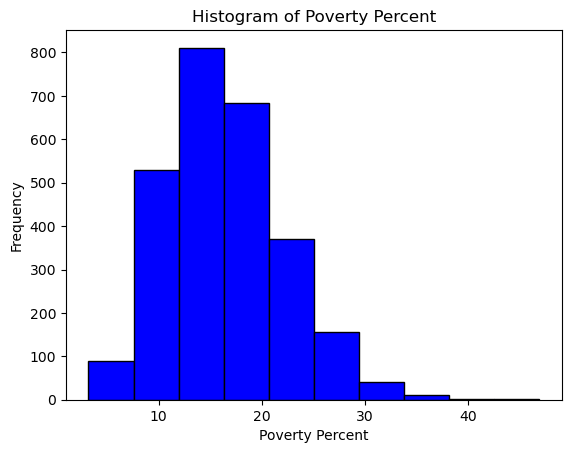

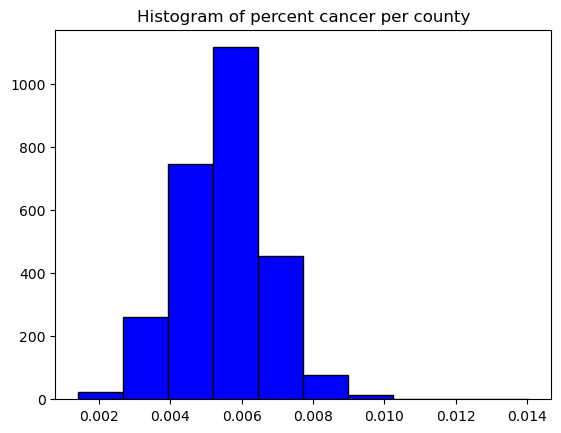

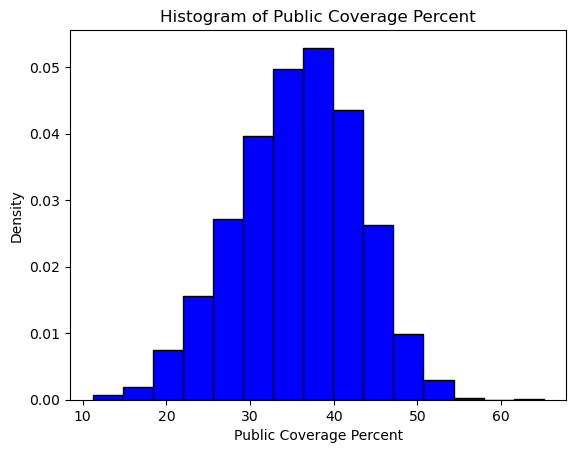

In [83]:
import matplotlib.pyplot as plt

plt.hist(df["povertypercent"], bins=10, color='blue', edgecolor='black')
plt.xlabel('Poverty Percent')
plt.ylabel('Frequency')
plt.title('Histogram of Poverty Percent')
plt.show()

plt.hist(df["pctcancer"], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of percent cancer per county')
plt.show()

plt.hist(df["pctpubliccoverage"], density=True, bins=15, color='blue', edgecolor='black')
plt.xlabel('Public Coverage Percent')
plt.ylabel('Density')
plt.title('Histogram of Public Coverage Percent')
plt.show()

### Research Question 2: Multiple Hypothesis Testing Visuals

This is a scatterplot of cancer rate by median income. We suspected that a lower median income would correlate with a higher cancer rate. This scatterplot confirms this suspicion because there seems to be a downward trend of cancer rate as the median income increases. This visualization helps us to answer our research question of "What socio-economic and demographic factors are associated with variations in cancer rates across different counties?" This plot helps to suggest an answer being the income being a socio-economic factor.

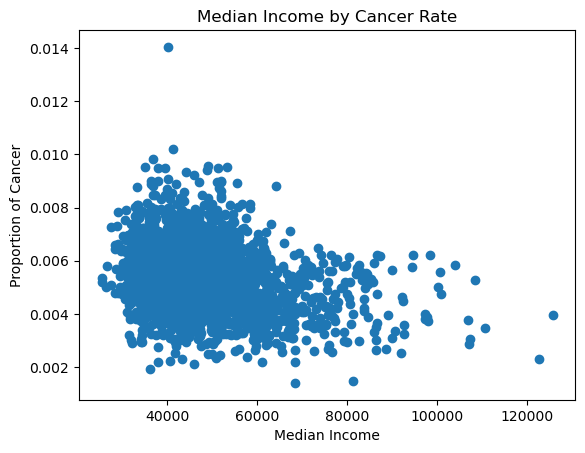

In [84]:
plt.scatter(x=df["medincome"],y=df['pctcancer'])
plt.xlabel("Median Income")
plt.ylabel("Proportion of Cancer")
plt.title("Median Income by Cancer Rate");

### Research Question 1: Bayesian Hierarchical Models Visuals

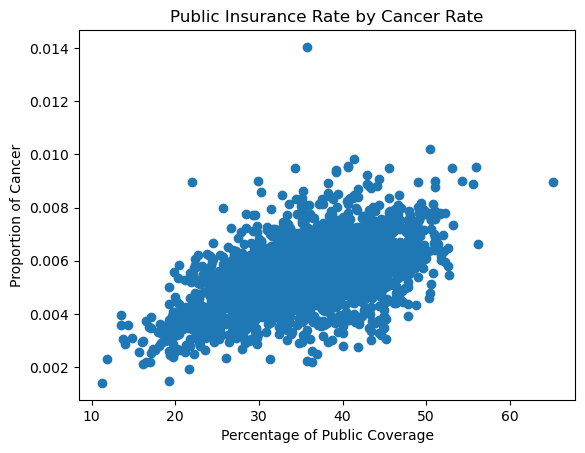

In [85]:
'''
visualize public insurance per cancer rate to 
show that there is some correlation between
 cancer rate and public insurance percent.
'''
plt.scatter(x=df["pctpubliccoverage"],y=df['pctcancer'])
plt.xlabel("Percentage of Public Coverage")
plt.ylabel("Proportion of Cancer")
plt.title("Public Insurance Rate by Cancer Rate");

Public Insurance Rate by Cancer Rate EDA. This graph confirms our prior belief that public insurance rate has some generally positive linear correlation to cancer rate, and therefore justifies asking our first research question: How does the distribution of cancer rates change with this observed data (public insurance rate) and if we can fit a Bayesian Gaussian Mixture Model to the distribution of cancer rates.                                                                                                                                    Our assumption is that because these two variables are correlated, we anticipate that if we group public insurance rate into two clusters each cluster will have their own cancer rate.

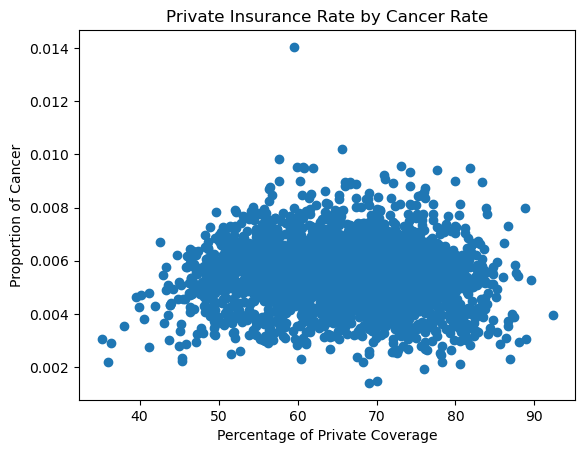

In [86]:
'''
visualize private insurance per cancer rate to 
show that there is some correlation between
 cancer rate and private insurance percent.
'''
plt.scatter(x=df["pctprivatecoverage"],y=df['pctcancer'])
plt.xlabel("Percentage of Private Coverage")
plt.ylabel("Proportion of Cancer")
plt.title("Private Insurance Rate by Cancer Rate");

Originally we had wanted to do research question 1 using private insurance, but after seeing that there was not really any correlation in this scatter plot between private insurance and cancer rate, we have decided to change our question to be public insurance.

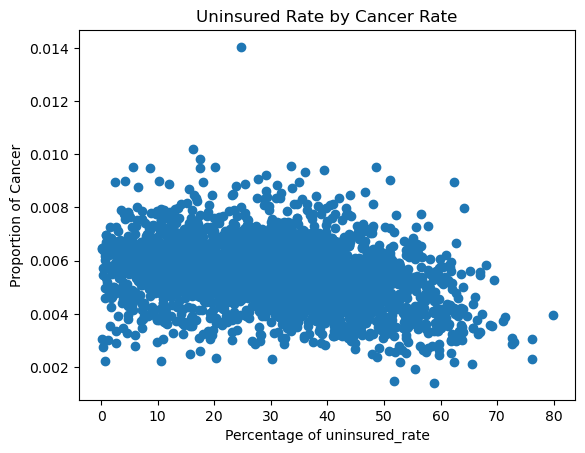

In [87]:
'''
visualize public insurance per cancer rate to 
show that there is some correlation between
 cancer rate and non-insurance percent.
'''
plt.scatter(x=df["uninsured_rate"],y=df['pctcancer'])
plt.xlabel("Percentage of uninsured_rate")
plt.ylabel("Proportion of Cancer")
plt.title("Uninsured Rate by Cancer Rate");

## Categorical Data

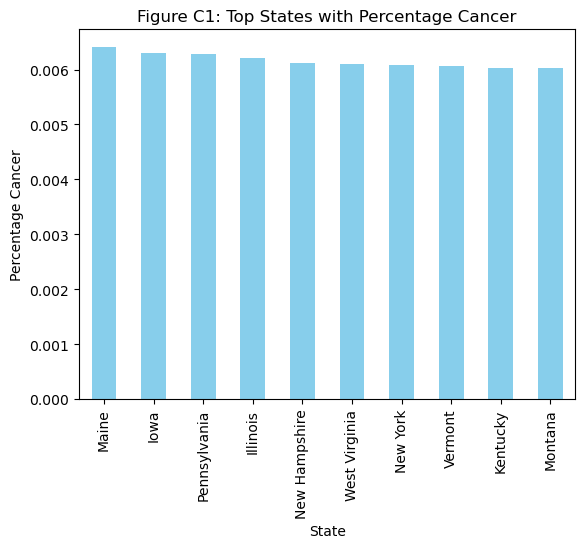

In [88]:
#creating a new categorical column by extracting state from county column and visualize
df["state"] = df.geography.str.split(', ').str[1];

top_states = df.groupby("state")["pctcancer"].mean().nlargest(10)  # Change 10 to the desired number of top states

# Create a bar chart
top_states.plot(kind="bar", color="skyblue")
plt.title("Figure C1: Top States with Percentage Cancer")
plt.xlabel("State")
plt.ylabel("Percentage Cancer")
plt.show()

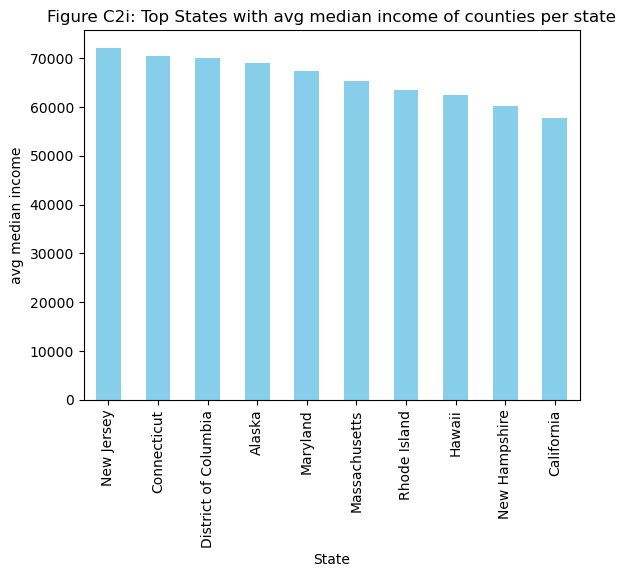

In [89]:
#state and medincome; 10 largest

df["state"] = df.geography.str.split(', ').str[1];

top_states = df.groupby("state")["medincome"].mean().nlargest(10)  # Change 10 to the desired number of top states

top_states.plot(kind="bar", color="skyblue")
plt.title("Figure C2i: Top States with avg median income of counties per state")
plt.xlabel("State")
plt.ylabel("avg median income")
plt.show()

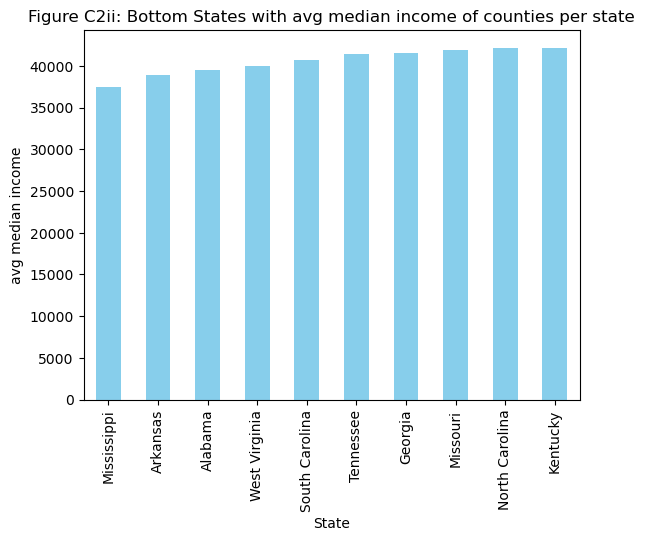

In [90]:
#state and medincome; 10 smallest

df["state"] = df.geography.str.split(', ').str[1];

top_states = df.groupby("state")["medincome"].mean().nsmallest(10)  # Change 10 to the desired number of top states

top_states.plot(kind="bar", color="skyblue")
plt.title("Figure C2ii: Bottom States with avg median income of counties per state")
plt.xlabel("State")
plt.ylabel("avg median income")
plt.show()

### Research Question 2 Visuals

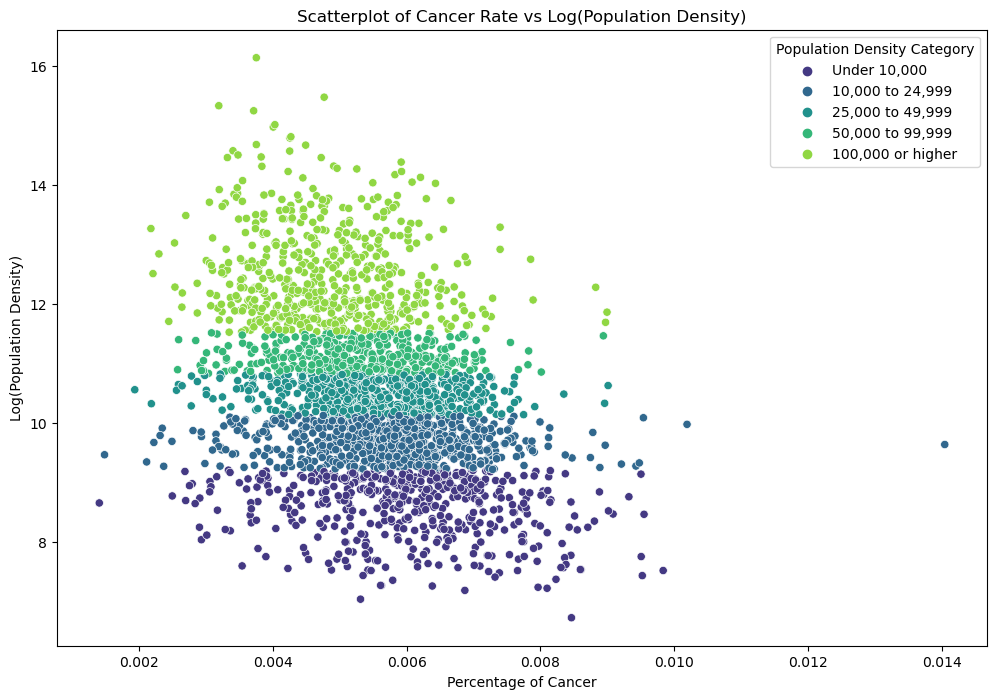

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom bins and labels, these bins were taken directly from the census
#https://www.census.gov/newsroom/press-releases/2023/population-estimates-counties.html#:~:text=As%20of%20July%201%2C%202022,of%201%20million%20or%20more.
bins = [0, 10000, 25000, 50000, 100000, float('inf')]
labels = ['Under 10,000', '10,000 to 24,999', '25,000 to 49,999', '50,000 to 99,999', '100,000 or higher']

# Create a new column 'population_density_category' based on the custom bins
df['population_density_category'] = pd.cut(df['popest2015'], bins=bins, labels=labels, right=False)

# Log transformation on the y-axis (population density)
df['log_popest2015'] = np.log1p(df['popest2015'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pctcancer', y='log_popest2015', hue='population_density_category', data=df, palette='viridis')
plt.title('Scatterplot of Cancer Rate vs Log(Population Density)')
plt.xlabel('Percentage of Cancer')
plt.ylabel('Log(Population Density)')
plt.legend(title='Population Density Category')
plt.show()

This scatterplot attempts to answer one of the multiple testing scenarios: 

Hypothesis 6 (Impact of Population Density on Cancer Rate):
Null Hypothesis (H0): There is no association between the population density (popest2015) and the cancer rate in the counties.
Alternative Hypothesis (H1): Counties with higher population density have a different cancer rate compared to counties with lower population density. 

It currently does not appear that there are any clear or strong associations with this scatterplot yet but we would still need to test for this. However, there seems to be slightly more variation in the percentage of cancer of smaller counties than that of bigger counties which might lead us to believe H1 just based off of this scatterplot.


### Research Question 1 Visuals:

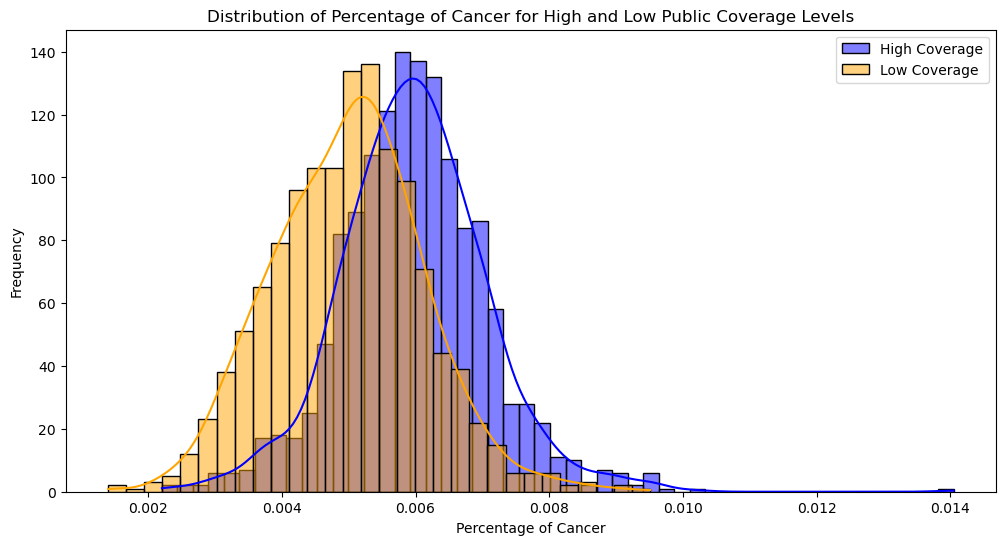

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of pctpubliccoverage
mean_pctpubliccoverage = df['pctpubliccoverage'].mean()

# Create a new column named 'coverage_level'
df['coverage_level'] = ['high' if value > mean_pctpubliccoverage else 'low' for value in df['pctpubliccoverage']]
# df['coverage_level']
# Plotting histograms for 'high' and 'low' coverage levels
plt.figure(figsize=(12, 6))
sns.histplot(df[df['coverage_level'] == 'high']['pctcancer'], kde=True, label='High Coverage', color='blue')
sns.histplot(df[df['coverage_level'] == 'low']['pctcancer'], kde=True, label='Low Coverage', color='orange')

plt.title('Distribution of Percentage of Cancer for High and Low Public Coverage Levels')
plt.xlabel('Percentage of Cancer')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This graph provides proof for our first question: How does the distribution of cancer rates change with this observed data (public insurance rate) and if we can fit a Bayesian Gaussian Mixture Model to the distribution of cancer rates. We are seeing that splitting the two groups into high or low public insurance clusters suggests that the average percentage of cancer may come from two different gaussian distributions as evidenced by the two different overlayed KDE plots which have different means.

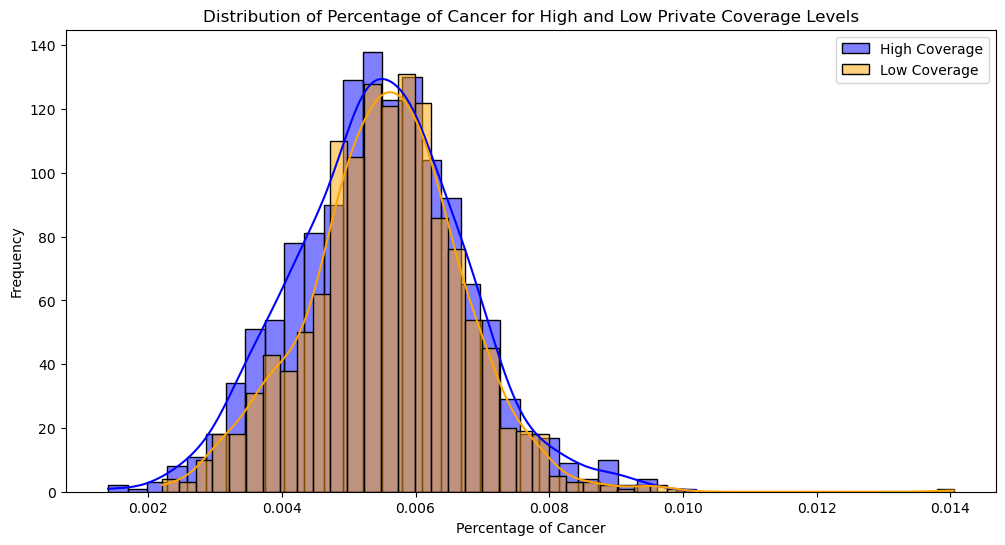

In [93]:
# Calculate the mean of pctpubliccoverage
mean_pctprivatecoverage = df['pctprivatecoverage'].mean()

# Create a new column named 'coverage_level'
df['coverage_level_priv'] = ['high' if value > mean_pctprivatecoverage else 'low' for value in df['pctprivatecoverage']]

# Plotting histograms for 'high' and 'low' coverage levels
plt.figure(figsize=(12, 6))
sns.histplot(df[df['coverage_level_priv'] == 'high']['pctcancer'], kde=True, label='High Coverage', color='blue')
sns.histplot(df[df['coverage_level_priv'] == 'low']['pctcancer'], kde=True, label='Low Coverage', color='orange')

plt.title('Distribution of Percentage of Cancer for High and Low Private Coverage Levels')
plt.xlabel('Percentage of Cancer')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Just to check it out, we also tried to see if Private Coverage showed that average cancer came from two different clusters of high or low coverage of insurance, which was our original research question. However after seeing that public insurance has more of a correlation (with the scatter plot up above), and given that average cancer doesn't look like it's coming from two different distributions, we have decided to use Public Coverage for research question 1.

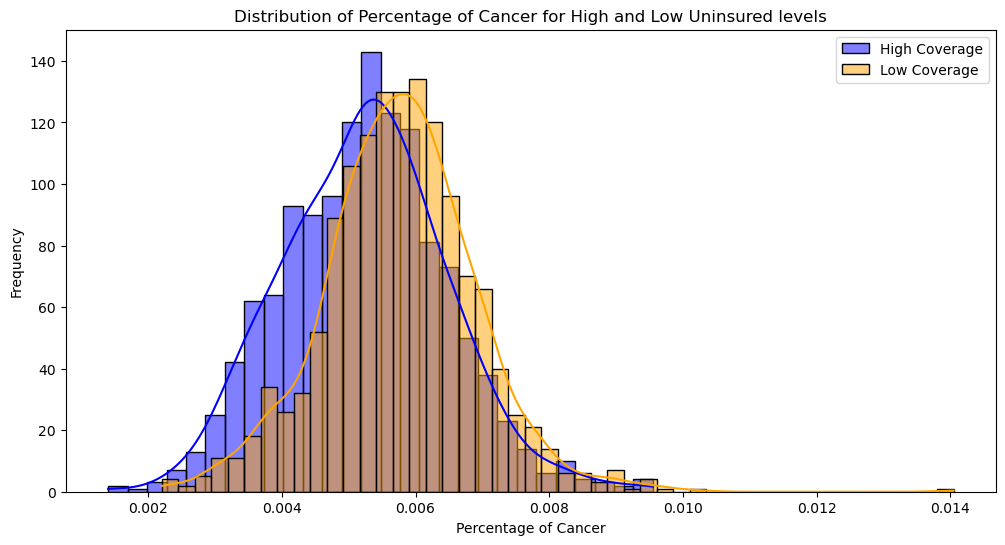

In [94]:
# Calculate the mean of uninsured
mean_pctuninsured = df['uninsured_rate'].mean()

# Create a new column named 'coverage_level'
df['coverage_level_uninsured'] = ['high' if value > mean_pctuninsured else 'low' for value in df['uninsured_rate']]

# Plotting histograms for 'high' and 'low' coverage levels
plt.figure(figsize=(12, 6))
sns.histplot(df[df['coverage_level_uninsured'] == 'high']['pctcancer'], kde=True, label='High Coverage', color='blue')
sns.histplot(df[df['coverage_level_uninsured'] == 'low']['pctcancer'], kde=True, label='Low Coverage', color='orange')

plt.title('Distribution of Percentage of Cancer for High and Low Uninsured levels')
plt.xlabel('Percentage of Cancer')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Histogram for both insured and uninsured data.

# Q2 results

In [23]:
# !pip install statsmodels==0.14.0

In [25]:
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# Drop rows with NaN or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

hypotheses = [
    ("Cancer Rate and Median Income", "medincome"),
    ("Association with Poverty Percentage", "povertypercent"),
    ("Association between Clinical Trials and Cancer Rate", "studypercap"),
    ("Impact of Education on Cancer Rate", "pctbachdeg18_24"),  # Adjust variables accordingly
    ("Employment Status and Cancer Rate", "pctemployed16_over"),
    ("Impact of Population Density on Cancer Rate", "popest2015")
]

results_bonferroni = []
results_benjamini_yekutieli = []

# bonferroni correction
for hypothesis, variable in hypotheses:
    # testing
    correlation_coefficient, p_value = pearsonr(df[variable], df['pctcancer'])

    results_bonferroni.append({
        "Hypothesis": hypothesis,
        "Variable": variable,
        "Correlation Coefficient": correlation_coefficient,
        "P-Value": p_value
    })

p_values_bonferroni = [result["P-Value"] for result in results_bonferroni]

# apply bonferroni correction
reject_bonferroni, adjusted_p_values_bonferroni, _, _ = multipletests(p_values_bonferroni, alpha=0.05, method='bonferroni')

# update bonferroni results with corrected p-values and rejection status
for i, result in enumerate(results_bonferroni):
    result["Adjusted P-Value"] = adjusted_p_values_bonferroni[i]
    result["Reject Null Hypothesis"] = reject_bonferroni[i]

# benjamini-yekutieli correction
for hypothesis, variable in hypotheses:
    correlation_coefficient, p_value = pearsonr(df[variable], df['pctcancer'])

    results_benjamini_yekutieli.append({
        "Hypothesis": hypothesis,
        "Variable": variable,
        "Correlation Coefficient": correlation_coefficient,
        "P-Value": p_value
    })

p_values_benjamini_yekutieli = [result["P-Value"] for result in results_benjamini_yekutieli]

# apply benjamini-yekutieli correction
reject_benjamini_yekutieli, adjusted_p_values_benjamini_yekutieli, _, _ = multipletests(p_values_benjamini_yekutieli, alpha=0.05, method='fdr_by')

# update benjamini-yekutieli results with corrected p-values and rejection status
for i, result in enumerate(results_benjamini_yekutieli):
    result["Adjusted P-Value"] = adjusted_p_values_benjamini_yekutieli[i]
    result["Reject Null Hypothesis"] = reject_benjamini_yekutieli[i]

df_bonferroni = pd.DataFrame(results_bonferroni)
df_benjamini_yekutieli = pd.DataFrame(results_benjamini_yekutieli)

df_bonferroni

,Hypothesis,Variable,Correlation Coefficient,P-Value,Adjusted P-Value,Reject Null Hypothesis
0,Cancer Rate and Median Income,medincome,-0.255604,1.511538e-09,9.069228e-09,True
1,Association with Poverty Percentage,povertypercent,-0.017710,6.805079e-01,1.000000e+00,False
2,Association between Clinical Trials and Cancer...,studypercap,0.035960,4.029926e-01,1.000000e+00,False
3,Impact of Education on Cancer Rate,pctbachdeg18_24,-0.064110,1.356997e-01,8.141981e-01,False
4,Employment Status and Cancer Rate,pctemployed16_over,-0.185754,1.321511e-05,7.929067e-05,True
5,Impact of Population Density on Cancer Rate,popest2015,-0.182950,1.790004e-05,1.074002e-04,True


In [26]:
df_benjamini_yekutieli

,Hypothesis,Variable,Correlation Coefficient,P-Value,Adjusted P-Value,Reject Null Hypothesis
0,Cancer Rate and Median Income,medincome,-0.255604,1.511538e-09,2.221961e-08,True
1,Association with Poverty Percentage,povertypercent,-0.017710,6.805079e-01,1.000000e+00,False
2,Association between Clinical Trials and Cancer...,studypercap,0.035960,4.029926e-01,1.000000e+00,False
3,Impact of Education on Cancer Rate,pctbachdeg18_24,-0.064110,1.356997e-01,4.986963e-01,False
4,Employment Status and Cancer Rate,pctemployed16_over,-0.185754,1.321511e-05,8.771018e-05,True
5,Impact of Population Density on Cancer Rate,popest2015,-0.182950,1.790004e-05,8.771018e-05,True


# Q1 Results

Observed:
- Ci: `pctcancer`: Percentage of cancer rate

Hidden:
- `Pi`: Cluster assignments (latent variable)

Parameters:
- `mu`: Cluster means
- `sigma`: Cluster standard deviations
- `pi`: Mixing proportionss

In [215]:
import pymc as pm

#rerun in case of any issues from Q2
df = pd.read_csv("cancer_reg.csv")
#Creating new column for incidence rate of cancer based off of average annual 
#count and population estimates for 2015
df['pctcancer'] = df['avganncount'] / df['popest2015']
#dropping inconsistencies
df = df[df['avganncount'] != 1962.667684]
#creating a new column for total uninsured rate
df['uninsured_rate'] = 1 - df['pctpubliccoverage'] + df['pctprivatecoverage']
# df = df[df['uninsured_rate'] >= 0]

df['pctcancer'].describe()

count    2841.000000
mean        0.005507
std         0.001229
min         0.001403
25%         0.004747
50%         0.005532
75%         0.006283
max         0.014048
Name: pctcancer, dtype: float64

## PyMC Sampling
Note that this takes quite a long time and memory to run and we might try to use sampling to lower the number of datapoints for testing.

In [240]:
mean_pctpubliccoverage = df['pctpubliccoverage'].mean()
df['coverage_level'] = ['high' if value > mean_pctpubliccoverage else 'low' for value in df['pctpubliccoverage']]

random_datapoints = df.sample(n=750, random_state=42)  # Adjust the random_state as needed for reproducibility
cancer_rates = random_datapoints['pctcancer']
pct_public = random_datapoints['pctpubliccoverage']

# Bayesian Gaussian Mixture Model
with pm.Model() as cancer_model:
    
    # Indicator for the county to be high or low public insurance rate
    p = pm.Bernoulli('p', p=0.5, shape=len(cancer_rates))
    
    # Cluster means given some prior information
    mu = pm.Normal('mu', mu=[0.004747, 0.006283] , sigma=0.001229, shape=2)
    
    # Cluster standard deviations, we have no prior knowledge here
    sigma = pm.Uniform('sigma', lower=0, upper=100, shape=2)

    # Deterministic variable for predicted cluster assignments
    predicted_cluster = pm.Deterministic('predicted_cluster', mu[0] - mu[1])
    
    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mu[p], sigma=sigma[p], observed=cancer_rates)

    # Sampling
    trace = pm.sample(1000, return_inferencedata=False, tune=1000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [p]
>NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 100 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


## Credible Interval

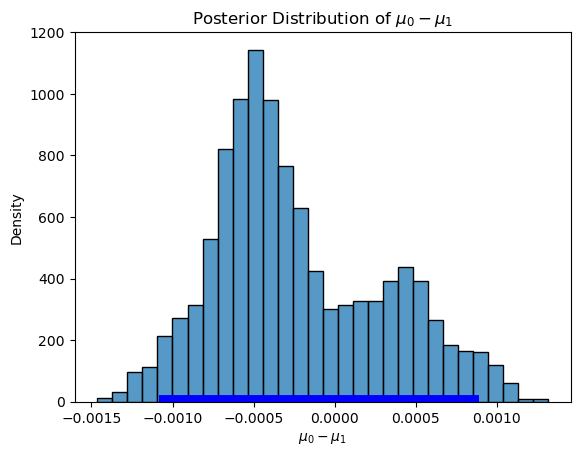

In [241]:
test_statistics = trace['predicted_cluster']

# Draw the credible interval
plt.hlines(0, np.percentile(test_statistics, 2.5), np.percentile(test_statistics, 97.5), colors='blue', linewidth=10)

sns.histplot(test_statistics, stat = "density");
plt.title(r"Posterior Distribution of $\mu_0 - \mu_1$");
plt.xlabel(r"$\mu_0 - \mu_1$");

## Posterior Sample Results

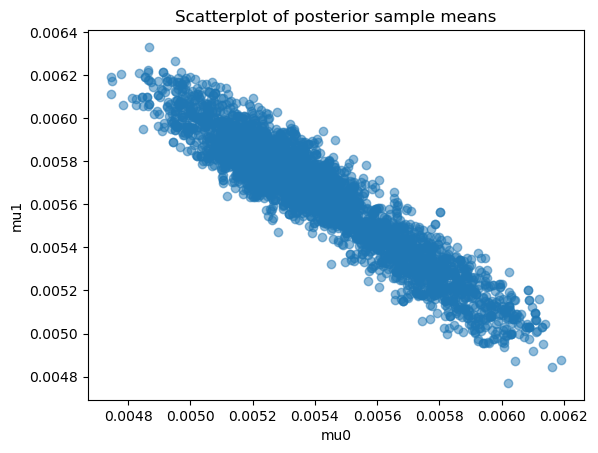

In [242]:
samples_mu0 = trace['mu'][:, 0]
samples_mu1 = trace['mu'][:, 1]

# Generate a scatterplot
plt.scatter(samples_mu0, samples_mu1, alpha=0.5)
plt.xlabel('mu0')
plt.ylabel('mu1')
plt.title('Scatterplot of posterior sample means')
plt.show()

### Under the posterior, what is the probability that more of the cancer rates came from cluster 0, low public insurance?

In [243]:
from scipy.stats import beta, binom
samples_z = trace['p']

#mean of 1's in the trace array
mean_samples = np.mean(samples_z)

# # Calculate the cumulative probability cdf uses less than or equal to, we want z1 to be less than or equal to 49, not equal to 50.
cumulative_prob = binom.cdf(49, 100, mean_samples)
cumulative_prob

0.4617444002907737

### Under the posterior, what is the probability that cluster 0 has a greater rate of cancer than cluster 1?

In [244]:
# Extract posterior samples for the difference in means
posterior_diff_means = trace['mu'][:, 0] - trace['mu'][:, 1]

# Calculate the probability that cluster 0 has a greater rate of cancer than cluster 1
probability_cluster_0_greater = np.mean(posterior_diff_means > 0)
probability_cluster_0_greater

0.297

In [245]:
print(np.median(trace['mu'][:, 0]))
print(np.median(trace['mu'][:, 1]))

0.005349699135534682
0.005704427322852759


### Visualizing Cluster Assignment

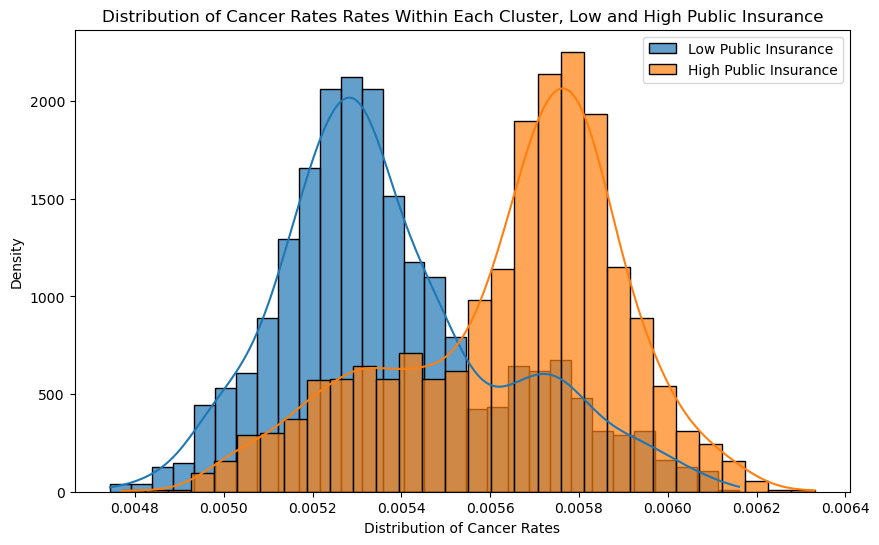

In [246]:
# Extracting the posterior samples of cluster assignments
posterior_z = trace['p']

# Visualizing the distribution of cancer rates within each cluster using Seaborn
plt.figure(figsize=(10, 6))
for i in range(2):  # Assuming 2 clusters
    cluster_data = trace['mu'][:, i][posterior_z[:, i] == 1]
    if i == 0:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'Low Public Insurance', alpha=0.7, stat='density')
    else:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'High Public Insurance', alpha=0.7, stat='density')


plt.title('Distribution of Cancer Rates Rates Within Each Cluster, Low and High Public Insurance')
plt.xlabel('Distribution of Cancer Rates')
plt.ylabel('Density')
plt.legend()
plt.show()

## Additional Attempts
### Using 3 Clusters Instead of 2

In [118]:
# Bayesian Gaussian Mixture Model
with pm.Model() as cancer_model:
    
    # Indicator for the county to be high or low public insurance rate
    p = pm.Dirichlet('p', a=np.ones(3))
    
    # Cluster means given some prior information
    mu = pm.Normal('mu', mu=[0.004747, 0.005532, 0.006283] , sigma=0.001229, shape=3)
    
    # Cluster standard deviations, we have no prior knowledge here
    sigma = pm.Uniform('sigma', lower=0, upper=100, shape=3)

    # Deterministic variable for predicted cluster assignments
    predicted_cluster = pm.Deterministic('predicted_cluster', mu[0] - mu[1])

    # Deterministic variable for predicted cluster assignments
    cluster_assignment = pm.Categorical('cluster_assignment', p=p, shape=len(cancer_rates))
    
    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mu[cluster_assignment], sigma=sigma[cluster_assignment], observed=cancer_rates)

    # Sampling
    trace = pm.sample(1000, return_inferencedata=False, tune=1000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, mu, sigma]
>CategoricalGibbsMetropolis: [cluster_assignment]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 319 seconds.
/srv/conda/envs/notebook/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


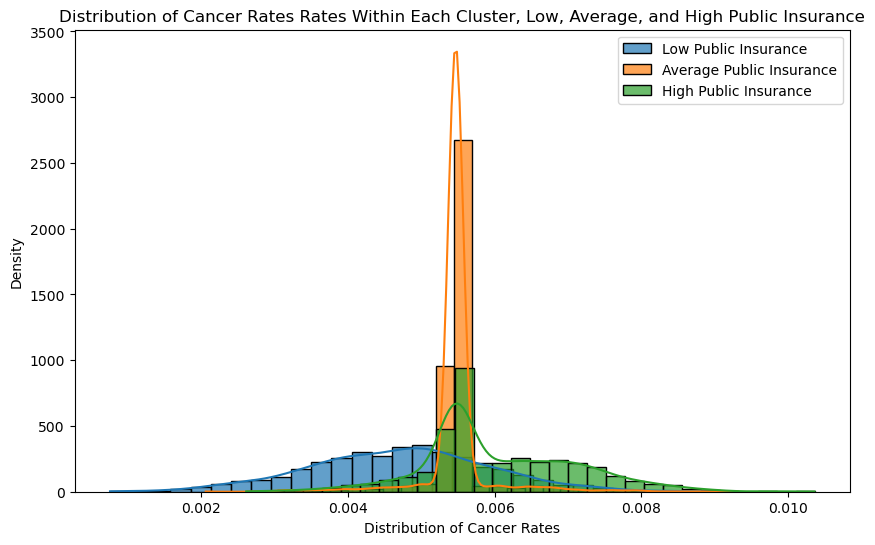

In [119]:
# Visualizing the distribution of cancer rates within each cluster using Seaborn
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 2 clusters
    cluster_data = trace['mu'][:, i][posterior_z[:, i] == 1]
    if i == 0:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'Low Public Insurance', alpha=0.7, stat='density')
    elif i==1:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'Average Public Insurance', alpha=0.7, stat='density')
    else:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'High Public Insurance', alpha=0.7, stat='density')


plt.title('Distribution of Cancer Rates Rates Within Each Cluster, Low, Average, and High Public Insurance')
plt.xlabel('Distribution of Cancer Rates')
plt.ylabel('Density')
plt.legend()
plt.show()

### Trying Different Priors
Flat

In [247]:
with pm.Model() as flat_prior_model:
    # Indicator for the county to be high or low public insurance rate
    p = pm.Bernoulli('p', p=0.5, shape=len(cancer_rates))

    # Cluster means with flat priors
    mu = pm.Flat('mu', shape=2, initval=[0.004747, 0.006283])
    
    # Cluster standard deviations with flat priors
    sigma = pm.Flat('sigma', shape=2, initval=[1, 1])  # Adjust according to your problem

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mu[p], sigma=sigma[p], observed=cancer_rates)

    # Sampling
    trace_flat = pm.sample(1000, return_inferencedata=False, tune=1000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [p]
>NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 278 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


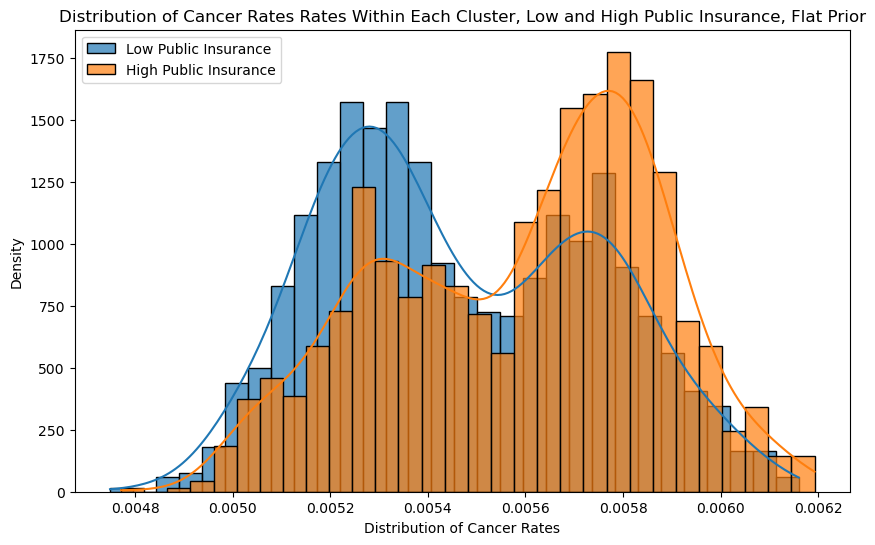

In [251]:
# Extracting the posterior samples of cluster assignments
posterior_z = trace_flat['p']

# Visualizing the distribution of cancer rates within each cluster using Seaborn
plt.figure(figsize=(10, 6))
for i in range(2):  # Assuming 2 clusters
    cluster_data = trace['mu'][:, i][posterior_z[:, i] == 1]
    if i == 0:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'Low Public Insurance', alpha=0.7, stat='density')
    else:
        sns.histplot(cluster_data, bins=30, kde=True, label=f'High Public Insurance', alpha=0.7, stat='density')


plt.title('Distribution of Cancer Rates Rates Within Each Cluster, Low and High Public Insurance, Flat Prior')
plt.xlabel('Distribution of Cancer Rates')
plt.ylabel('Density')
plt.legend()
plt.show()

In [252]:
# Extract posterior samples for the difference in means
posterior_diff_means = trace_flat['mu'][:, 0] - trace_flat['mu'][:, 1]

# Calculate the probability that cluster 0 has a greater rate of cancer than cluster 1
probability_cluster_0_greater = np.mean(posterior_diff_means > 0)
probability_cluster_0_greater

0.52125